# **Apple Twitter Sentiment Analysis**

## **Business Understanding**

### **Business Context**

Apple is one of the most talked-about brands on social media, with millions of people sharing their opinions of its products, services, and company decisions. Understanding public sentiment from these discussions can help the company track brand perception, customer satisfaction, and market trends. Due to this, the project uses Natural Language Processing (NLP) and machine learning to classify Apple-related tweets as positive, negative, or neutral. By identifying the best-performing model, we can help the company and analysts gain valuable insights into public opinion, guiding better decision-making

### **Problem Statement**
Understanding public sentiment toward Apple on Twitter is challenging due to short, informal text and varying contexts. Misclassifying sentiment can lead to inaccurate insights, affecting company's decisions. This project aims to determine the most effective sentiment analysis model by comparing traditional machine learning and deep learning approaches to achieve the highest accuracy.

## **Objectives**


#### **Main Objective**
To develop an accurate sentiment analysis model for Apple-related tweets by comparing traditional machine learning and deep learning approaches.

### **Specific Objectives**
1.	To preprocess Apple-related tweets by cleaning, tokenizing, and normalizing text data to ensure high-quality input for analysis.
2.	To handle data imbalance and enhance dataset quality using techniques such as SMOTE and other resampling methods to create a well-balanced training set.
3.	To develop and compare multiple sentiment classification models, including traditional machine learning such as Logistic Regression, and XGBoost and deep learning approaches such as LSTM and CNN, to identify the most effective model.
4.	To evaluate model performance using appropriate metrics such as accuracy ensuring the best-performing model provides reliable sentiment insights.


### **Why Machine Learning and Deep Learning?**

Machine Learning (ML) and Deep Learning (DL) are well-suited for sentiment analysis due to their ability to handle large-scale text data, capture patterns in language, and generalize well across unseen data.
- **Machine Learning (ML)** models such as Logistic Regression and XGBoost are interpretable, computationally efficient, and perform well on structured text features like TF-IDF and word embeddings. These models offer quick training times and are useful for baseline comparisons.

-	**Deep Learning (DL)** models like LSTM and CNN excel in understanding contextual meaning, capturing sequential dependencies, and leveraging pre-trained knowledge from large-scale corpora. These models significantly improve accuracy in sentiment classification by recognizing complex language patterns.


By combining both approaches, we can compare performance, efficiency, and scalability, ensuring the most effective model is selected for sentiment analysis.


### **Success Metrics**
The model's performance was evaluated using the following key metrics:
1.	Accuracy – The percentage of correctly classified sentiments, with a target of above 70%.
2.	Overfitting Control – The model was assessed for generalization, ensuring minimal performance gaps between training and test sets.
3.	Model Stability – The model's consistency was tested across different subsets of data to confirm its reliability.

Success was defined as achieving these metrics while preventing overfitting and ensuring robust sentiment classification.


### **Key Stakeholders**
1.	Apple Inc. – Understands public sentiment to enhance product development, marketing strategies, and customer engagement.

2.	Investors & Market Analysts – Leverage sentiment insights to predict consumer confidence and potential stock movements.

3.	Marketing & PR Teams – Optimize branding, crisis management, and targeted advertising based on sentiment trends.

4.	Technology Consumers & Apple Users – Benefit from improved products, services, and customer support driven by sentiment analysis.

5.	Data Scientists & AI Researchers – Gain insights into NLP advancements and sentiment analysis techniques for future applications.


## **Data Understanding**
The dataset consists of **3886 tweets**, each labeled with sentiment and sentiment confidence scores.

### **Sentiment Distribution**
- **Neutral (3)**: 2162 tweets (Largest class)
- **Negative (1)**: 1219 tweets
- **Positive (5)**: 423 tweets
- **Not Relevant**: 82 tweets
- **Observation**: The dataset is **imbalanced**, with more neutral and negative tweets.

### **Sentiment Confidence Scores**
- The scores range from **0.3 to 1.0**.
- **Peaks at 0.7 and 1.0**, indicating varying label reliability.
- **High-confidence labels** can be prioritized for training to improve model accuracy.

### **Tweet Length Distribution**
- Most tweets are **between 100 and 140 characters**.
- A **longer tweet length** trend is observed, likely due to detailed opinions or news articles.

### **Handling Missing Values**
- `sentiment_gold`: **Missing in 3783 rows**, making it **unusable**.
- `_last_judgment_at`: **103 missing values**, but **not critical** for modeling.

### **Duplicates**
- **No duplicate tweets** found.

### **Top Hashtags and Words**
- **Top Hashtags**: `#AAPL`, `#Apple`, `#trading`, `#Stocks`, `#iPhone6`.
- **Top Words**: "apple", "aapl", "http", "rt", indicating **frequent mentions of Apple products, financial discussions, and retweets**.

In [ ]:
# Import the necessary libraries
# General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# NLP libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import contractions
from textblob import TextBlob
from wordcloud import WordCloud
from gensim.models import Word2Vec

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D,
    Flatten, Dense, Dropout, BatchNormalization,
    GlobalAveragePooling1D, Input
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import l2

# Scikit-learn & ML models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report

# XGBoost
from xgboost import XGBClassifier

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


from collections import Counter

In [ ]:
# Load the dataset
df = pd.read_csv("Apple-Twitter-Sentiment-DFE.csv", encoding="ISO-8859-1")

In [ ]:
# Display the first few rows
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
# Displaying the last 5 rows
df.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
3881,623499442,True,golden,13,NaN,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,623499450,True,golden,16,NaN,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,623499486,True,golden,14,NaN,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,623499514,True,golden,13,NaN,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...
3885,623517290,True,golden,17,NaN,5,0.8938,Tue Dec 09 09:01:25 +0000 2014,5.420000e+17,#AAPL OR @Apple,5\n3\nnot_relevant,RT @SwiftKey: We're so excited to be named to ...


In [ ]:
# Check dataset shape
print("Shape:", df.shape)

Shape: (3886, 12)


In [ ]:
# Check the unique values
df.nunique()

,0
_unit_id,3886
_golden,2
_unit_state,2
_trusted_judgments,19
_last_judgment_at,388
sentiment,4
sentiment:confidence,654
date,3795
id,3
query,1


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
3,2162
1,1219
5,423
not_relevant,82


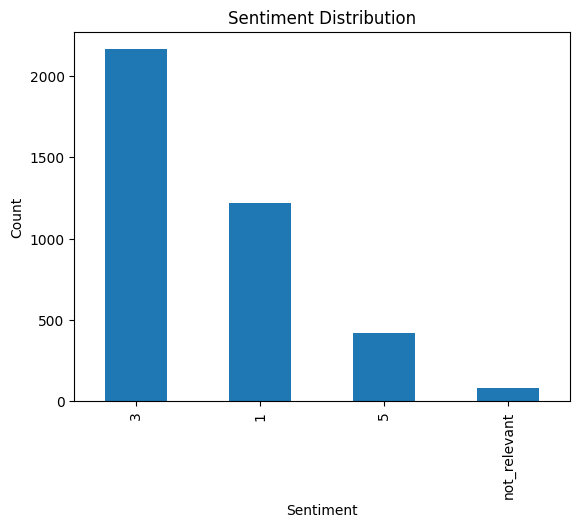

In [ ]:
# Count sentiment labels
df['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [ ]:
# Set column width to display full tweets
pd.options.display.max_colwidth = None

# Display sample tweets for each sentiment category
for sentiment_value in df['sentiment'].unique():
    print(f"Sentiment: {sentiment_value}")
    print(df[df['sentiment'] == sentiment_value]['text'].sample(3, random_state=42).to_string(index=False))
    print("\n" + "="*80 + "\n")


Sentiment: 3
                    Photographing the White House Christmas Decorations With an iPhone 6 by @BrooksKraftFoto  @apple http://t.co/lPDqbJqnV5
            #Apple Wants To Make Your Commute Much Easier, According To This New Patent #aapl http://t.co/fKMNHCmwJU http://t.co/wdqAzQowt3
RT @OneRepublic: Studio at 45,000 ft.  One outlet,  4 computers.  @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET


Sentiment: 5
                               @MhDaDon @Apple def gotta have it, I don't even like watches
fun..fun nights..Post birthday celebration of rfrancoben and @apple. http://t.co/maRHLxgV0F
                                         I'm really enjoying GarageBand. @apple #GarageBand


Sentiment: 1
RT @OneRepublic: Studio at 45,000 ft.  One outlet,  4 computers.  @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET
       How is 'never' interpreted as 'ask me again annoyingly soon' when iOS apps ask to be rated?  @apple tell your devs

- Sentiment 3 (Neutral/Mixed): News articles, patents, and general discussions without strong emotion.

- Sentiment 5 (Positive): Praising Apple products, expressing excitement.

- Sentiment 1 (Negative): Complaints, frustrations, sarcastic remarks.

- Sentiment "not_relevant": Mentions that may not be related to sentiment analysis, such as general Apple mentions in unrelated contexts.

In [ ]:
# Check for missing values
df.isnull().sum()

,0
_unit_id,0
_golden,0
_unit_state,0
_trusted_judgments,0
_last_judgment_at,103
sentiment,0
sentiment:confidence,0
date,0
id,0
query,0


In [ ]:
# Duplicates
df.duplicated().sum()

0

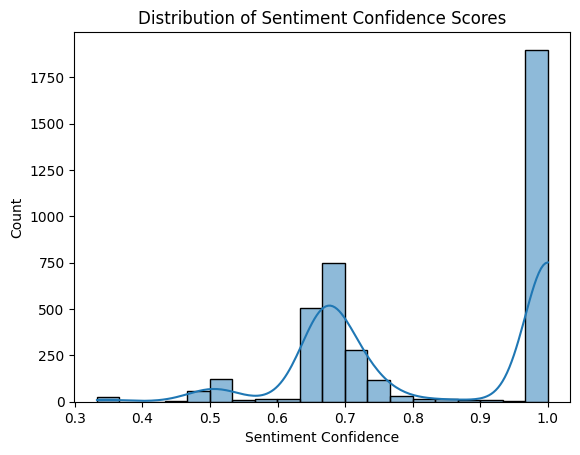

In [ ]:
# Distribution of Sentiment Confidence Scores
sns.histplot(df['sentiment:confidence'], bins=20, kde=True)
plt.xlabel("Sentiment Confidence")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Confidence Scores")
plt.show()


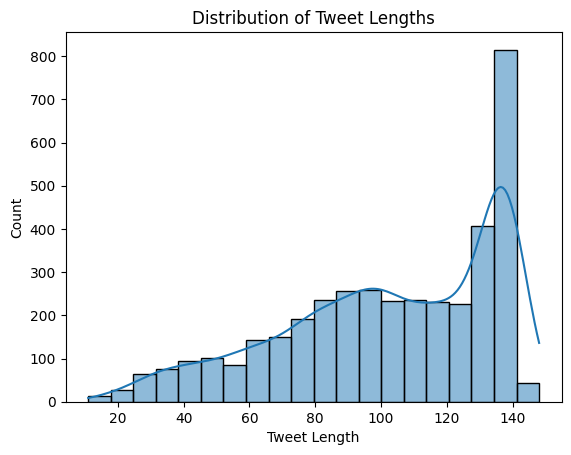

In [ ]:
# Tweet Length Distribution
df["tweet_length"] = df["text"].str.len()

sns.histplot(df["tweet_length"], bins=20, kde=True)
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.title("Distribution of Tweet Lengths")
plt.show()

In [ ]:
# Common Words & Hashtags

# Join all tweets into one string
all_text = " ".join(df["text"].dropna())

# Extract hashtags
hashtags = re.findall(r"#\w+", all_text)
hashtag_counts = Counter(hashtags).most_common(10)

# Extract words (excluding stopwords & special characters)
words = re.findall(r"\b\w+\b", all_text.lower())
word_counts = Counter(words).most_common(10)

print("Top 10 Hashtags:", hashtag_counts)
print("Top 10 Words:", word_counts)


Top 10 Hashtags: [('#AAPL', 569), ('#aapl', 466), ('#Apple', 251), ('#DieIn', 152), ('#iPhone', 64), ('#iPhone6', 57), ('#apple', 55), ('#December', 54), ('#trading', 48), ('#Stocks', 39)]
Top 10 Words: [('apple', 3957), ('t', 2597), ('co', 2324), ('http', 2269), ('the', 1701), ('aapl', 1385), ('to', 1053), ('in', 870), ('is', 868), ('rt', 848)]


## **Data Cleaning/Text Cleaning**

Data Cleaning involved the following
#### 1. Lowercasing

   -Converting all text to lowercase to ensure uniformity.

#### 2. Removing URLs

   -Eliminating links (http://..., www...) as they don’t contribute to sentiment analysis.

#### 3. Removing Mentions

   -Deleting @username to focus on tweet content rather than tagged users.

#### 4. Removing Hashtags

   -Striping hashtags (#Apple, #iPhone) as they were not be needed for text analysis.

#### 5. Removing Special Characters

   -Keeping only alphanumeric text and spaces, removing punctuation or symbols.

#### 6. Removing Extra Spaces

   -Ensuring there were no unnecessary spaces between words.

#### 7. Removing Stopwords

   -Filtering common words like "the", "is", "and" while keeping negations (not, no, never) to preserve meaning.

#### 8. Handling Duplicates

   -Removing duplicate tweets to avoid bias in the dataset.


In [ ]:
df.head(20)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text,tweet_length
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx,65
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9,94
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #AppleSnob.,51
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see",136
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL,44
5,623495518,True,golden,13,NaN,3,0.5975,Mon Dec 01 20:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS,88
6,623495519,True,golden,13,NaN,5,0.8468,Mon Dec 01 20:32:45 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB,61
7,623495520,True,golden,9,NaN,5,0.6736,Mon Dec 01 20:34:31 +0000 2014,5.400000e+17,#AAPL OR @Apple,5\n3,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK,75
8,623495521,True,golden,15,NaN,3,0.7997,Mon Dec 01 20:36:47 +0000 2014,5.400000e+17,#AAPL OR @Apple,1,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL,74
9,623495522,False,finalized,3,12/12/14 0:52,3,0.6360,Mon Dec 01 20:45:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd,101


In [ ]:
#Extracting just the important columns needed for this analysis
#that is, sentiment and text

df = df[["date" , "sentiment:confidence", 'sentiment', 'text']]
df.head(10)

,date,sentiment:confidence,sentiment,text
0,Mon Dec 01 19:30:03 +0000 2014,0.6264,3,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx
1,Mon Dec 01 19:43:51 +0000 2014,0.8129,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9
2,Mon Dec 01 19:50:28 +0000 2014,1.0000,3,My cat only chews @apple cords. Such an #AppleSnob.
3,Mon Dec 01 20:26:34 +0000 2014,0.5848,3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see"
4,Mon Dec 01 20:29:33 +0000 2014,0.6474,3,Nobody expects the Spanish Inquisition #AAPL
5,Mon Dec 01 20:30:03 +0000 2014,0.5975,3,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS
6,Mon Dec 01 20:32:45 +0000 2014,0.8468,5,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB
7,Mon Dec 01 20:34:31 +0000 2014,0.6736,5,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK
8,Mon Dec 01 20:36:47 +0000 2014,0.7997,3,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL
9,Mon Dec 01 20:45:03 +0000 2014,0.6360,3,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd


In [ ]:
#checking null values
df.isnull().sum()

,0
date,0
sentiment:confidence,0
sentiment,0
text,0


sentiment
3               2162
1               1219
5                423
not_relevant      82
Name: count, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


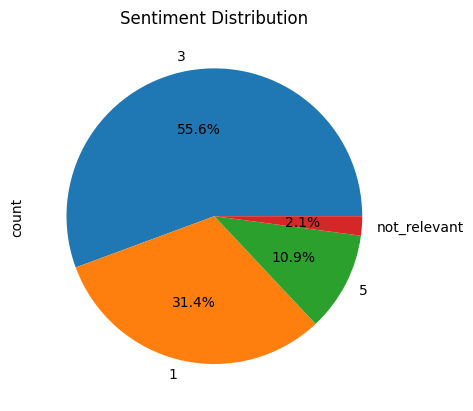

In [ ]:
#checking value count in sentiment column
print(df.sentiment.value_counts())
print(df.sentiment.value_counts().plot(kind='pie', title="Sentiment Distribution", autopct='%1.1f%%'));


In [ ]:
#removing unnecessary row not_relevant because it does not contribute to the analysis
df = df[df['sentiment'] != 'not_relevant']
print(df.sentiment.unique())

['3' '5' '1']


In [ ]:
#checking duplicates
print(df.duplicated().sum())
duplicates = df[df.duplicated(subset=["text"], keep=False)]
print(duplicates)




4
                                date  sentiment:confidence sentiment  \
29    Tue Dec 02 00:15:26 +0000 2014                1.0000         3   
32    Tue Dec 02 00:16:27 +0000 2014                0.6604         3   
34    Tue Dec 02 00:18:59 +0000 2014                0.6515         3   
38    Tue Dec 02 00:24:26 +0000 2014                1.0000         3   
42    Tue Dec 02 00:27:36 +0000 2014                1.0000         3   
...                              ...                   ...       ...   
3852  Tue Dec 09 21:12:55 +0000 2014                0.7325         3   
3854  Tue Dec 09 21:14:04 +0000 2014                1.0000         1   
3855  Tue Dec 09 21:17:24 +0000 2014                0.6785         1   
3878  Tue Dec 09 21:24:22 +0000 2014                0.6839         5   
3885  Tue Dec 09 09:01:25 +0000 2014                0.8938         5   

                                                                                                                                     

In [ ]:
#checking duplicates
df[df.duplicated()]

,date,sentiment:confidence,sentiment,text
1437,Thu Dec 04 20:39:48 +0000 2014,1.0,3,"RT @OneRepublic: Studio at 45,000 ft. One outlet, 4 computers. @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET"
1445,Thu Dec 04 20:39:55 +0000 2014,1.0,3,"RT @OneRepublic: Studio at 45,000 ft. One outlet, 4 computers. @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET"
1449,Thu Dec 04 20:39:58 +0000 2014,1.0,3,"RT @OneRepublic: Studio at 45,000 ft. One outlet, 4 computers. @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET"
2511,Sat Dec 06 18:46:30 +0000 2014,1.0,1,"NO @apple NO! When I make an I phone Album I WANT IT TO STAY ON PHONE, not be removed when camera roll cleared.. GET IT TOGETHER!"


##### There were are no duplicates just retweets

In [ ]:
#convert date to date_time format
#convert sentiment to integer
print(df.info())

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['sentiment'] = df['sentiment'].fillna(99).astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 3804 entries, 0 to 3885
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  3804 non-null   object 
 1   sentiment:confidence  3804 non-null   float64
 2   sentiment             3804 non-null   object 
 3   text                  3804 non-null   object 
dtypes: float64(1), object(3)
memory usage: 148.6+ KB
None


##### Defining the text cleaning function

In [ ]:
# Ensuring stopwords are available
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = set(stopwords.words("english")) - {"not", "no", "never"}  # Keep negations

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Define text cleaning function
def clean_text(text):
    # Convert to lowercase. Converting all text to lowercase to ensure uniformity.
    text = text.lower().strip()
    # Expand contractions
    text = contractions.fix(text)
    # Eliminating links (http://..., www...) as they don’t contribute to sentiment analysis.
    text = re.sub(r"http\S+|www\S+", "", text)
    # Deleting @username to focus on tweet content rather than tagged users.
    text = re.sub(r"@\w+", "", text)
    # Striping hashtags (#Apple, #iPhone) as they were not be needed for text analysis.
    text = re.sub(r"#[A-Za-z0-9]+", "", text)
    # Keeping only alphanumeric text and spaces, removing punctuation or symbols.
    text = re.sub(r"[^A-Za-z0-9 ]+", "", text)
    # Ensuring there were no unnecessary spaces between words.
    text = re.sub(r"\s+", " ", text)
    #Filtering common words like "the", "is", "and" while keeping negations (not, no, never) to preserve meaning.
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

In [ ]:
# Apply cleaning to tweets
df["cleaned_text"] = df["text"].apply(clean_text)

In [ ]:
df.head(50)

,date,sentiment:confidence,sentiment,text,cleaned_text
0,2014-12-01 19:30:03+00:00,0.6264,3,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx,10 best steve jobs emails ever
1,2014-12-01 19:43:51+00:00,0.8129,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9,rt aapl stock miniflash crash today aapl
2,2014-12-01 19:50:28+00:00,1.0000,3,My cat only chews @apple cords. Such an #AppleSnob.,cat chews cords
3,2014-12-01 20:26:34+00:00,0.5848,3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see",agree not trade extended todays pullback good see
4,2014-12-01 20:29:33+00:00,0.6474,3,Nobody expects the Spanish Inquisition #AAPL,nobody expects spanish inquisition
5,2014-12-01 20:30:03+00:00,0.5975,3,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS,5 rocket stocks buy december gains apple
6,2014-12-01 20:32:45+00:00,0.8468,5,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB,top 3 damn right
7,2014-12-01 20:34:31+00:00,0.6736,5,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK,cnbctv margins better expected
8,2014-12-01 20:36:47+00:00,0.7997,3,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL,apple inc flash crash need know
9,2014-12-01 20:45:03+00:00,0.6360,3,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd,presentation shows makes worlds biggest tech companies


## **Feature Engineering**


In [ ]:
# Compute word count, character count, and average word length
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))
df["char_count"] = df["cleaned_text"].apply(len)
df["avg_word_length"] = df["char_count"] / df["word_count"]

df[["cleaned_text", "word_count", "char_count", "avg_word_length"]].head(10)

,cleaned_text,word_count,char_count,avg_word_length
0,10 best steve jobs emails ever,6,30,5.000000
1,rt aapl stock miniflash crash today aapl,7,40,5.714286
2,cat chews cords,3,15,5.000000
3,agree not trade extended todays pullback good see,8,49,6.125000
4,nobody expects spanish inquisition,4,34,8.500000
5,5 rocket stocks buy december gains apple,7,40,5.714286
6,top 3 damn right,4,16,4.000000
7,cnbctv margins better expected,4,30,7.500000
8,apple inc flash crash need know,6,31,5.166667
9,presentation shows makes worlds biggest tech companies,7,54,7.714286


In [ ]:
filtered_df = df[df["word_count"] > 16]  # Filter rows where avg_word_length > 15
print(filtered_df[["cleaned_text", "word_count", "sentiment"]].head(10))  # Display first 10 rows

                                                                                                     cleaned_text  \
69               force people use vpn built ios8 button not work ffs like want apples nsa data collection service   
98     hate ios 8 capitalizes random words like not want give emphasis stupid word tha sentence get self together   
394               hey love ya lowfi hold music awful would prefer hear tips using apple gear better use hold time   
1164                    11593 dec1 64 one crazy minute w 67m shares ms downgrade market weight amp trim stock 4 3   
1324   could really kick ass iphone 6 battery sucks moldy dick tuesday night worst shit ever last 4 fucking hours   
1388     spent 6000 eur apple iphone 6 camera no longer workstold got water iti not unacceptable customer service   
1391  rt spent 6000 eur apple iphone 6 camera no longer workstold got water iti not unacceptable customer service   
2271               mark words wild away iphone 5c bring back 4 i

In [ ]:
# Compute subjectivity using TextBlob
df["subjectivity"] = df["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Display the first few rows to check the computed subjectivity scores
df[["cleaned_text", "subjectivity", "sentiment", "sentiment:confidence"]].head(10)

,cleaned_text,subjectivity,sentiment,sentiment:confidence
0,10 best steve jobs emails ever,0.300000,3,0.6264
1,rt aapl stock miniflash crash today aapl,0.000000,3,0.8129
2,cat chews cords,0.000000,3,1.0000
3,agree not trade extended todays pullback good see,0.600000,3,0.5848
4,nobody expects spanish inquisition,0.000000,3,0.6474
5,5 rocket stocks buy december gains apple,0.000000,3,0.5975
6,top 3 damn right,0.517857,5,0.8468
7,cnbctv margins better expected,0.450000,5,0.6736
8,apple inc flash crash need know,0.000000,3,0.7997
9,presentation shows makes worlds biggest tech companies,0.000000,3,0.6360


#### **Observations:**

Subjectivity Scores:

* Values range from 0 (objective) to 1 (highly subjective).

* Some tweets have 0.0, indicating factual statements.

* Others, like "agree not trade extended todays pullback good see", have higher subjectivity (0.6), meaning they express opinions rather than facts.

## **Exploratory Data Analysis (EDA)**

### **1. Univariate Analysis**

In [ ]:
#pip install --upgrade pillow wordcloud

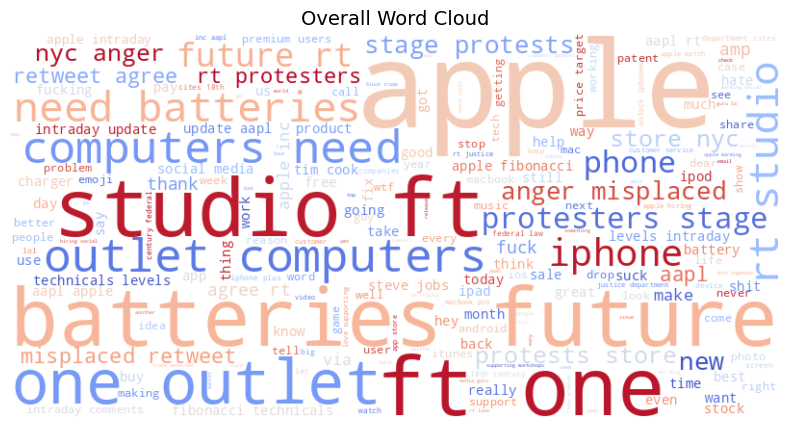

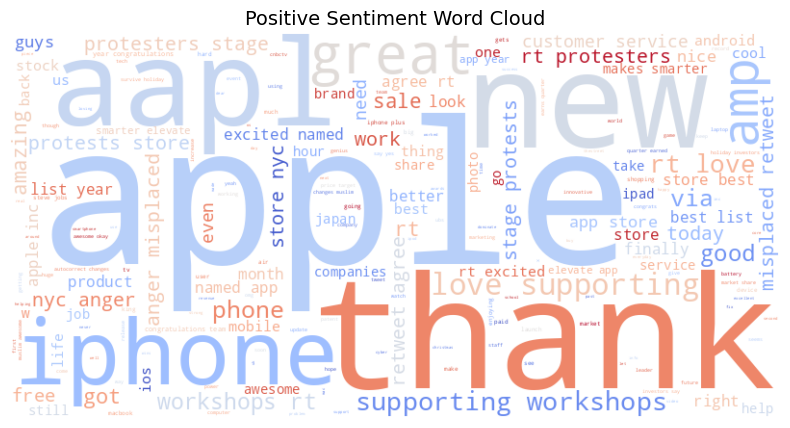

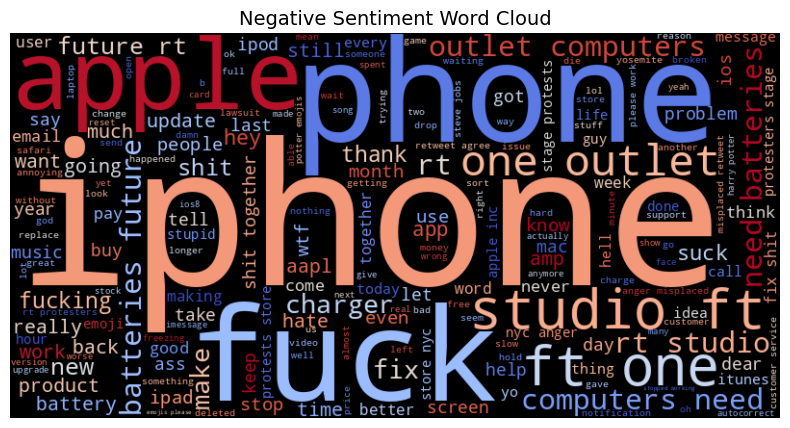

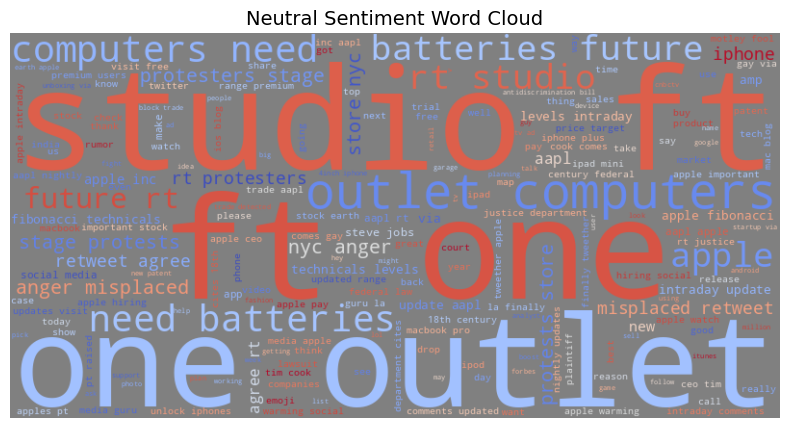

In [ ]:
# Function to generate a word cloud
def plot_wordcloud(text, title, color="black"):
    text = " ".join(text.astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color=color, colormap="coolwarm").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

### 🔹 1. Overall Word Cloud
plot_wordcloud(df["cleaned_text"], "Overall Word Cloud", color="white")

### 🔹 2. Sentiment-Specific Word Clouds
# Positive Tweets
plot_wordcloud(df[df["sentiment"] == 5]["cleaned_text"], "Positive Sentiment Word Cloud", color="white")

# Negative Tweets
plot_wordcloud(df[df["sentiment"] == 1]["cleaned_text"], "Negative Sentiment Word Cloud", color="black")

# Neutral Tweets
plot_wordcloud(df[df["sentiment"] == 3]["cleaned_text"], "Neutral Sentiment Word Cloud", color="gray")


#### **Observations**
Overall Word cloud:
* A mix of positive and negative words related to Apple products, such as "batteries," "studio," "protests," and "future." Some dissatisfaction is apparent (e.g., "misplaced," "anger"), but general topics include technology and Apple-related issues.

Positive Word Cloud:
* More positive sentiment with words like "thank," "new," "great," and "love." This suggests that many users are expressing appreciation for Apple products or services.

Negative Word Cloud:
* More negative sentiment, with words like "fuck," "suck," and "fix." This cloud highlights frustration with Apple, possibly related to product issues or customer service complaints.

Neutral Word Cloud:
* A more neutral cloud focusing on keywords like "studio," "outlet," "computers," and "batteries." This indicates general discussions about Apple products without a strong emotional tone.

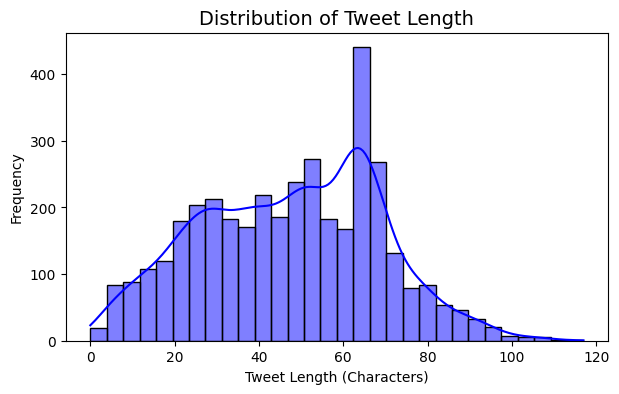

In [ ]:
# Character Length Distribution
plt.figure(figsize=(7, 4))
sns.histplot(df["char_count"], bins=30, kde=True, color="blue")
plt.title("Distribution of Tweet Length", fontsize=14)
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
plt.show()

* It ranges between 60- 70 characters


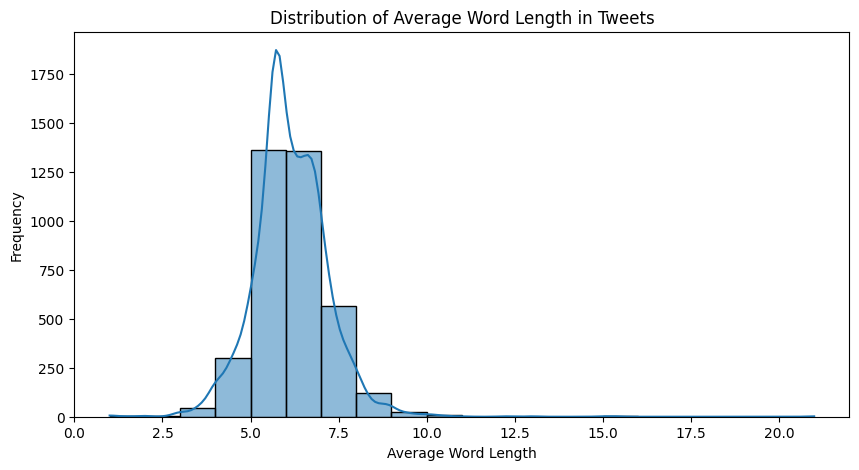

In [ ]:
# Histogram for average word length
plt.figure(figsize=(10,5))
sns.histplot(df["avg_word_length"], bins=20, kde=True)
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Average Word Length in Tweets")
plt.show()

* The average word length is mostly around 5-7 characters, indicating that most words in the dataset are relatively short.

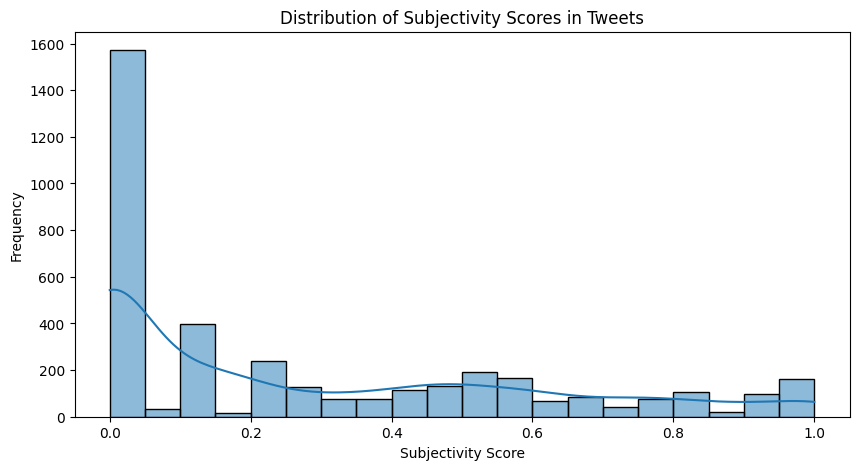

In [ ]:
# Histogram for subjectivity scores
plt.figure(figsize=(10,5))
sns.histplot(df["subjectivity"], bins=20, kde=True)
plt.xlabel("Subjectivity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Subjectivity Scores in Tweets")
plt.show()

This plot reveals that:

- Most tweets are objective → Subjectivity scores close to 0
- Only a smaller portion are strongly opinionated → Scores near 1
- That suggests many tweets are news, updates, or factual statements rather than personal opinions—useful insight for understanding tone on social media

### **2. Bivariate Analysis**

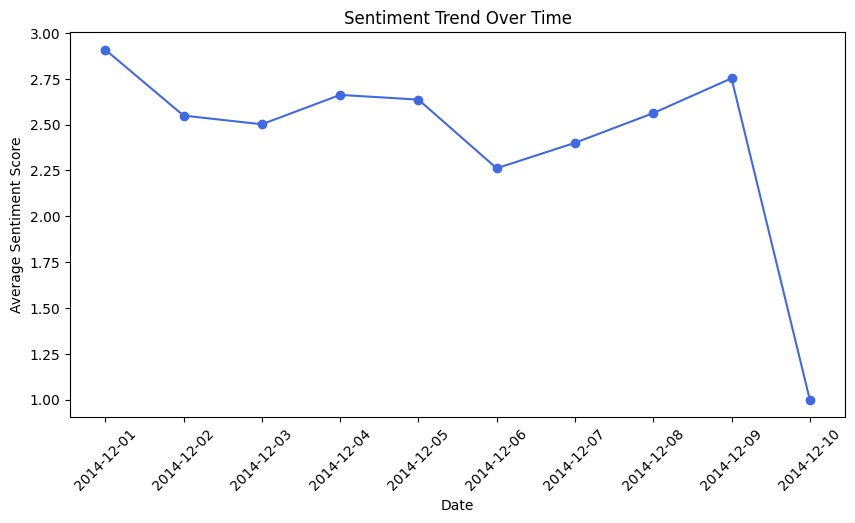

In [ ]:
#Sentiment distribution over time
#Group by date and calculate the mean sentiment
sentiment_trend = df.groupby(df['date'].dt.date)['sentiment'].mean()

#Plot
plt.figure(figsize=(10, 5))
sentiment_trend.plot(marker="o", color="royalblue")

#Labels and title
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trend Over Time")

#Show plot
plt.xticks(rotation=45)
plt.show()

#### **Observations**
* The average sentiment score fluctuates over time, indicating variation in user sentiment.

* The sentiment starts high (~3.0) on December 1, 2014, then slightly declines but remains around 2.5 - 2.7 until December 8.

* A sharp drop in sentiment occurs on December 10, 2014, reaching 1.0. This could be due to a significant event or a higher volume of negative tweets on that day.

* The peak on December 8 suggests a temporary increase in positive sentiment before the decline.

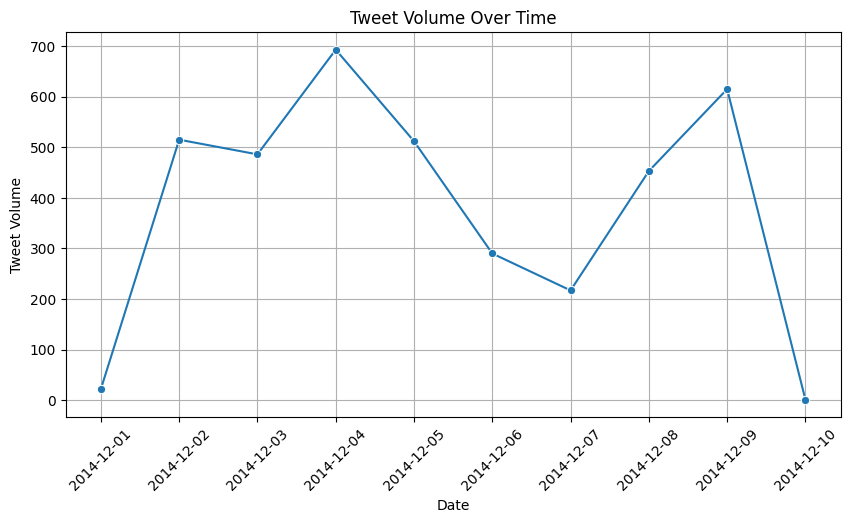

In [ ]:
#tweet volume per day
#Count tweets per day
tweet_counts = df.groupby(df['date'].dt.date).size()

#Plot tweet volume over time
plt.figure(figsize=(10,5))
sns.lineplot(x=tweet_counts.index, y=tweet_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Tweet Volume')
plt.title('Tweet Volume Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Observations
- This confirms that the drastic drop in sentiment on December 10 is likely due to a sharp decrease in tweet volume rather than a genuine sentiment shift.


- This could indicate missing data or a lack of engagement rather than a sentiment anomaly.

In [ ]:
df.columns

Index(['date', 'sentiment:confidence', 'sentiment', 'text', 'cleaned_text',
       'word_count', 'char_count', 'avg_word_length', 'subjectivity'],
      dtype='object')

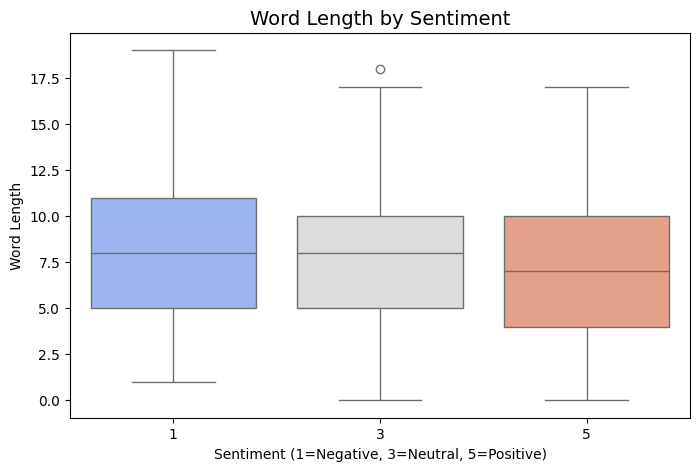

In [ ]:
# Sentiment vs. word count
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["sentiment"], y=df["word_count"], palette="coolwarm")
plt.title("Word Length by Sentiment", fontsize=14)
plt.xlabel("Sentiment (1=Negative, 3=Neutral, 5=Positive)")
plt.ylabel("Word Length")
plt.show()

#### Observations
* Similar median values across all sentiments, meaning tweet length doesn’t vary drastically by sentiment.
* Some outliers, but no extreme differences in distribution.
* Interquartile ranges (IQRs) are quite similar, suggesting tweets in all sentiment categories tend to have comparable word counts.

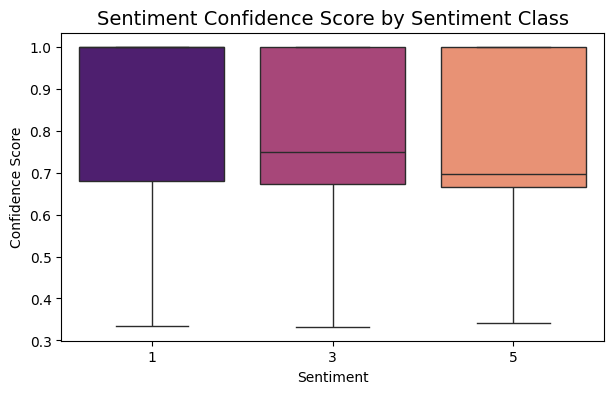

In [ ]:
# Sentiment vs. Confidence Score
plt.figure(figsize=(7, 4))
sns.boxplot(x=df["sentiment"], y=df["sentiment:confidence"], palette="magma")
plt.title("Sentiment Confidence Score by Sentiment Class", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Confidence Score")
plt.show()

#### Observations:
- Confidence is relatively high across all sentiment categories.
- Wide spread in confidence scores.
- No significant differences between sentiment categories.

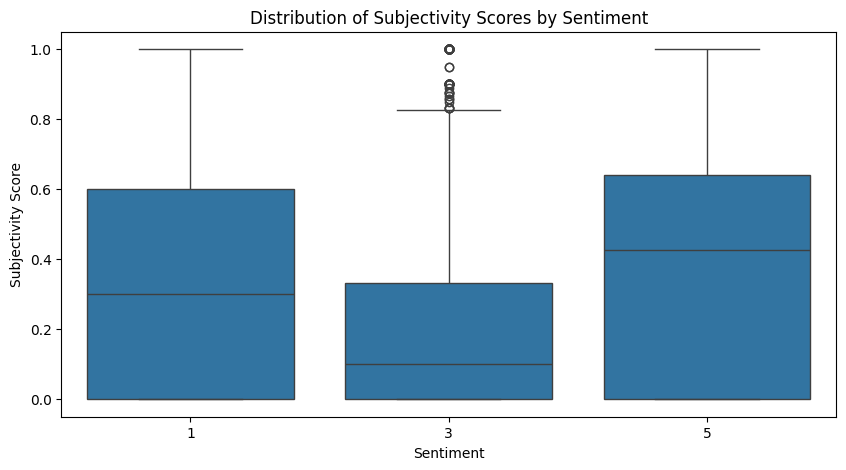

In [ ]:
# Analysis of Sentiment Labels & Subjectivity
plt.figure(figsize=(10,5))
sns.boxplot(x=df["sentiment"], y=df["subjectivity"])
plt.xlabel("Sentiment")
plt.ylabel("Subjectivity Score")
plt.title("Distribution of Subjectivity Scores by Sentiment")
plt.show()

- Negative and positive tweets are often more opinion-based, while neutral tweets are more fact-based.


- This aligns with expectations — neutral tweets tend to state facts, whereas opinions (positive/negative) include emotional language.

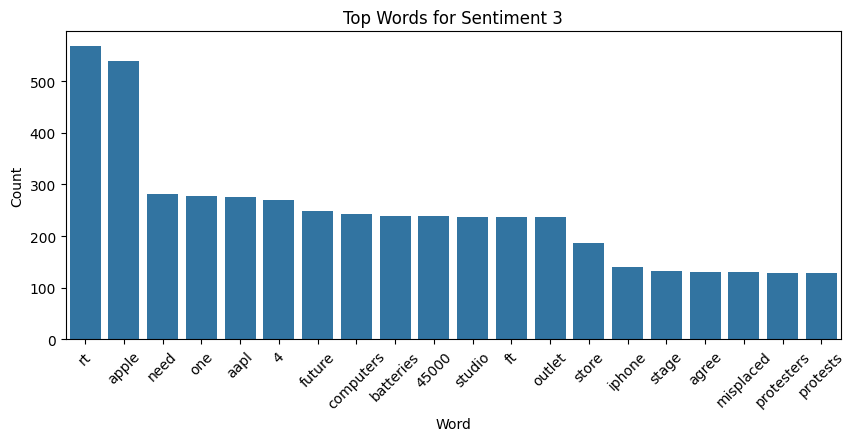

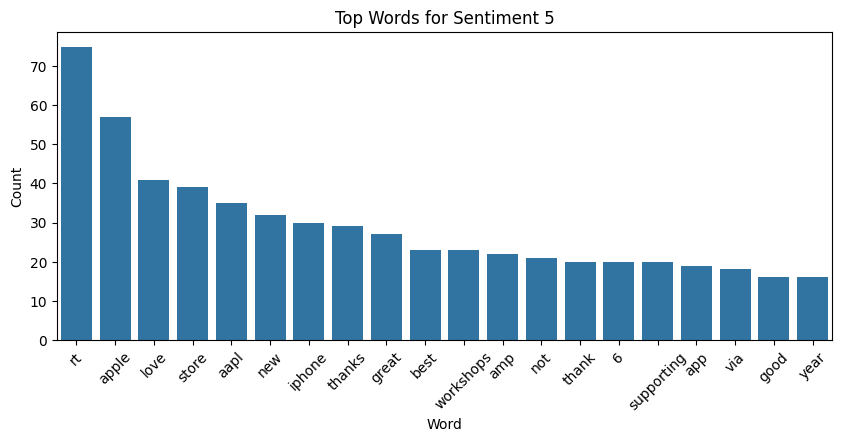

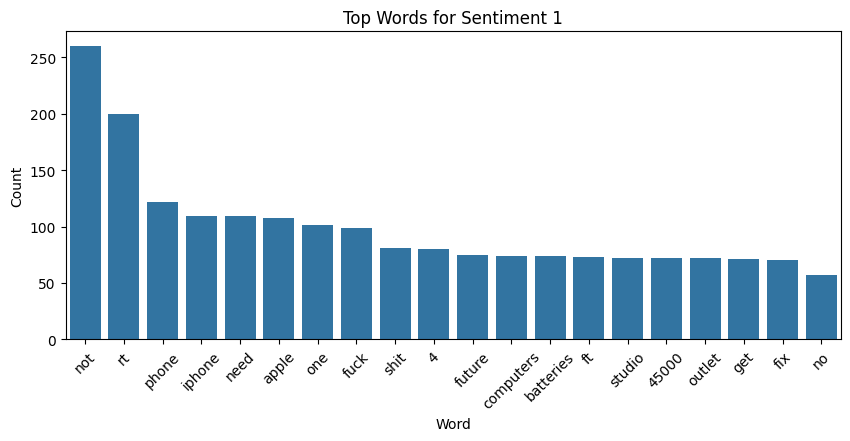

In [ ]:
#Most Common Words by Sentiment

#Find top words appearing in positive, negative, and neutral tweets.

from collections import Counter

def get_top_words(df, sentiment_label, n=20):
    words = " ".join(df[df["sentiment"] == sentiment_label]["cleaned_text"].dropna()).split()
    word_freq = Counter(words).most_common(n)
    return pd.DataFrame(word_freq, columns=["Word", "Count"])

for sentiment in df["sentiment"].unique():
    plt.figure(figsize=(10, 4))
    sns.barplot(data=get_top_words(df, sentiment), x="Word", y="Count")
    plt.title(f"Top Words for Sentiment {sentiment}")
    plt.xticks(rotation=45)
    plt.show()

#### Observation:
- Negative (Score 1): Strong dissatisfaction, often about Apple products. Complaints include technical issues and unmet expectations. Filtering explicit words may help in sentiment analysis.
- Neutral (Score 3): Focused on Apple stock and company updates, mainly from investors or analysts. Less emotional content.
- Positive (Score 5): Praise for Apple products and service. Driven by satisfaction, gratitude, and excitement over new releases.

### **3. Multivariate Analysis**

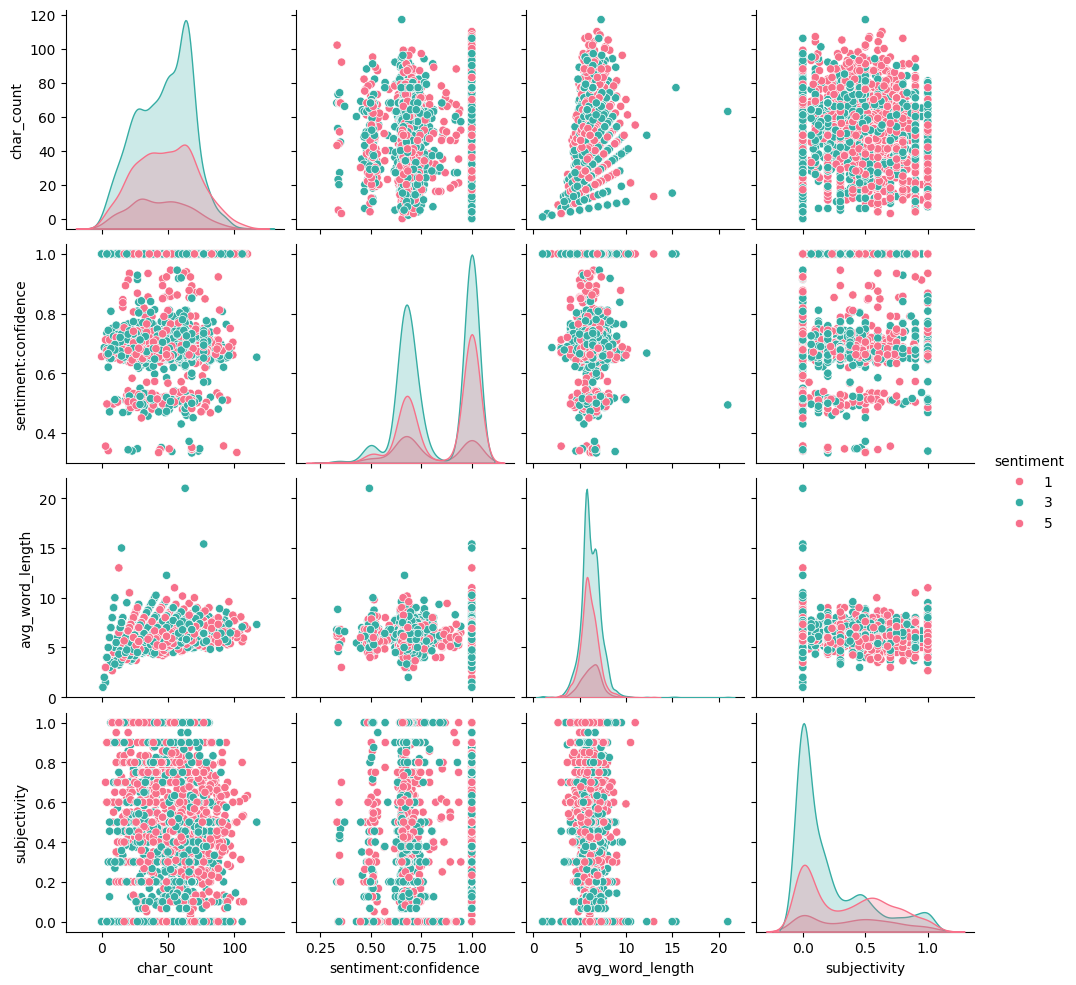

In [ ]:
# Pairplot of Numerical Features
num_features = ["sentiment", "char_count", "sentiment:confidence","avg_word_length","subjectivity"]
sns.pairplot(df[num_features], hue="sentiment", palette="husl")
plt.show()

  #### Observations:
- Feature Distributions: Some features (e.g., sentiment confidence, subjectivity) show distinct patterns, but others (e.g., char count, avg word length) have overlapping distributions.
- Feature Relationships: Certain features may help distinguish sentiment classes, but heavy overlap suggests some features may not be strong predictors.
- Class Separation: If sentiment classes form clear clusters, the features are effective. Otherwise, more feature engineering may be needed.

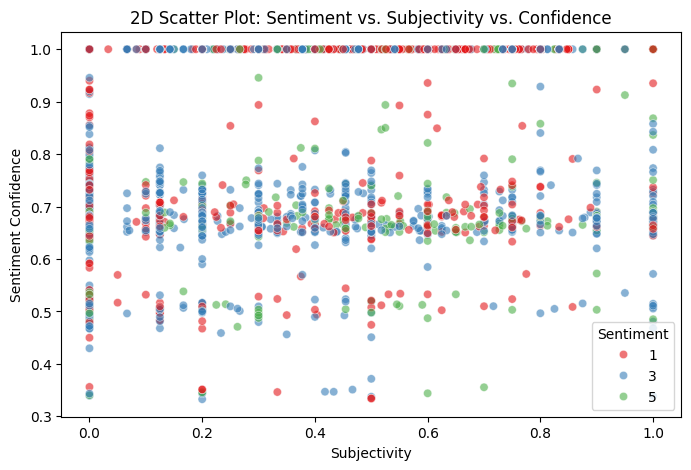

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df,
                x="subjectivity",
                y="sentiment:confidence",
                hue="sentiment",
                alpha=0.6,
                palette="Set1")
plt.title("2D Scatter Plot: Sentiment vs. Subjectivity vs. Confidence")
plt.xlabel("Subjectivity")
plt.ylabel("Sentiment Confidence")
plt.legend(title="Sentiment")
plt.show()

* The points appear scattered across the graph, indicating sentiment values are spread across different input features.
* The high density of blue and red points suggests that neutral and negative sentiments are more frequent in certain regions.
* Some sentiment clusters appear along the top and bottom, which might indicate edge cases or outliers.

### **Text Preprocessing**

In [ ]:
df

,date,sentiment:confidence,sentiment,text,cleaned_text,word_count,char_count,avg_word_length,subjectivity
0,2014-12-01 19:30:03+00:00,0.6264,3,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx,10 best steve jobs emails ever,6,30,5.000000,0.300000
1,2014-12-01 19:43:51+00:00,0.8129,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9,rt aapl stock miniflash crash today aapl,7,40,5.714286,0.000000
2,2014-12-01 19:50:28+00:00,1.0000,3,My cat only chews @apple cords. Such an #AppleSnob.,cat chews cords,3,15,5.000000,0.000000
3,2014-12-01 20:26:34+00:00,0.5848,3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see",agree not trade extended todays pullback good see,8,49,6.125000,0.600000
4,2014-12-01 20:29:33+00:00,0.6474,3,Nobody expects the Spanish Inquisition #AAPL,nobody expects spanish inquisition,4,34,8.500000,0.000000
...,...,...,...,...,...,...,...,...,...
3881,2014-12-09 22:08:53+00:00,0.7757,3,(Via FC) Apple Is Warming Up To Social Media - Apple is hiring a social media guru in L.A. Will @Apple finally twe... http://t.co/IpqoWRy2EM,via fc apple warming social media apple hiring social media guru la finally twe,14,79,5.642857,0.377778
3882,2014-12-09 22:18:27+00:00,0.6225,3,RT @MMLXIV: there is no avocado emoji may I ask why @apple,rt no avocado emoji may ask,6,27,4.500000,0.000000
3883,2014-12-09 23:45:59+00:00,0.9347,5,@marcbulandr I could not agree more. Between @Apple @Twitter and @IBMWatson only great things will happen. #AppleandIBM #IBMandTwitter,could not agree great things happen,6,35,5.833333,0.750000
3884,2014-12-10 00:48:10+00:00,0.9230,1,My iPhone 5's photos are no longer downloading automatically to my laptop when I sync it. @apple support is unhelpful. Any ideas?,iphone 5s photos no longer downloading automatically laptop sync support unhelpful ideas,12,88,7.333333,0.000000


#### Tokenization

In [ ]:
#!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')  # Needed for word_tokenize()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Apply tokenization to the 'cleaned_text' column
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

# Display a sample
print(df[['cleaned_text', 'tokens']].head())


                                        cleaned_text  \
0                     10 best steve jobs emails ever   
1           rt aapl stock miniflash crash today aapl   
2                                    cat chews cords   
3  agree not trade extended todays pullback good see   
4                 nobody expects spanish inquisition   

                                                       tokens  
0                       [10, best, steve, jobs, emails, ever]  
1            [rt, aapl, stock, miniflash, crash, today, aapl]  
2                                         [cat, chews, cords]  
3  [agree, not, trade, extended, todays, pullback, good, see]  
4                     [nobody, expects, spanish, inquisition]  


In [ ]:
# Initialize tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])  # Fit on cleaned text

# Convert words into numerical sequences
df['text_seq'] = tokenizer.texts_to_sequences(df['cleaned_text'])

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding
print(f"Vocabulary Size: {vocab_size}")

# Display first few rows to verify
df[['cleaned_text', 'text_seq']].head()


Vocabulary Size: 5213


,cleaned_text,text_seq
0,10 best steve jobs emails ever,"[206, 64, 40, 43, 219, 168]"
1,rt aapl stock miniflash crash today aapl,"[1, 7, 57, 1289, 337, 91, 7]"
2,cat chews cords,"[999, 2520, 617]"
3,agree not trade extended todays pullback good see,"[18, 4, 123, 2521, 1678, 1290, 85, 139]"
4,nobody expects spanish inquisition,"[2522, 2523, 2524, 1679]"


### Lemmatization

In [ ]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [ ]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Function for lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.is_alpha])  # Keep only alphabetic words

# Apply lemmatization
df["cleaned_text"] = df["cleaned_text"].apply(lemmatize_text)

# Display sample output
df["cleaned_text"].head()

,cleaned_text
0,good steve job email ever
1,rt aapl stock miniflash crash today aapl
2,cat chew cord
3,agree not trade extend todays pullback good see
4,nobody expect spanish inquisition


### TF-IDF Vectorization

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Adjust features if needed

# Transform the cleaned text
X = tfidf.fit_transform(df["cleaned_text"])

# Use the correct target column
y = df["sentiment"]

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Shape of train and test sets
X_train.shape, X_test.shape

((3043, 4031), (761, 4031))

- The dataset has 3,043 training samples and 761 test samples, with 4,031 TF-IDF features.

### Handling Class Imbalance with SMOTE

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance classes
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check the new class distribution
y_train_sm.value_counts()

,count
sentiment,
5,1730
3,1730
1,1730


### **Machine Learning Models**

**1. Logistic Regression (Baseline model)**

In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_sm, y_train_sm)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Baseline Model Accuracy: {accuracy:.4f}")
print(report)

Baseline Model Accuracy: 0.7280
              precision    recall  f1-score   support

           1       0.76      0.68      0.71       244
           3       0.78      0.81      0.80       432
           5       0.39      0.44      0.41        85

    accuracy                           0.73       761
   macro avg       0.64      0.64      0.64       761
weighted avg       0.73      0.73      0.73       761



### 2. Random Forest

In [ ]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy Score: 0.7398160315374507
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.60      0.68       244
           3       0.73      0.91      0.81       432
           5       0.58      0.26      0.36        85

    accuracy                           0.74       761
   macro avg       0.70      0.59      0.62       761
weighted avg       0.73      0.74      0.72       761



### 3. Stacking

In [ ]:
# Base learners
estimators = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

# Meta-learner (can be any classifier, LogisticRegression is a common choice)
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)

# Train the stacked model
stack_model.fit(X_train, y_train.values.ravel())

# Predict
y_pred_stack = stack_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_stack)
report = classification_report(y_test, y_pred_stack)

print(f"\nStacked Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)



Stacked Model Accuracy: 0.7332
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.62      0.68       244
           3       0.74      0.88      0.80       432
           5       0.63      0.28      0.39        85

    accuracy                           0.73       761
   macro avg       0.70      0.60      0.62       761
weighted avg       0.73      0.73      0.72       761



In [ ]:
# Base learners with class_weight='balanced' where applicable
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

# Meta learner (Logistic Regression)
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Create the stacking classifier
stacked_model_balanced = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=True,  # Optional: gives final estimator access to original features
    n_jobs=-1
)

# Fit the model
stacked_model_balanced.fit(X_train, y_train.values.ravel())

# Predict and evaluate
y_pred_stacked_balanced = stacked_model_balanced.predict(X_test)

# Output
print("Stacked Model with Class Weights Accuracy:", accuracy_score(y_test, y_pred_stacked_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_stacked_balanced))


Stacked Model with Class Weights Accuracy: 0.7450722733245729
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.63      0.69       244
           3       0.74      0.89      0.81       432
           5       0.65      0.33      0.44        85

    accuracy                           0.75       761
   macro avg       0.72      0.62      0.65       761
weighted avg       0.74      0.75      0.73       761



In [ ]:
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                       lr_params, cv=5, scoring='f1_macro', n_jobs=-1)
lr_grid.fit(X_train_sm, y_train_sm.values.ravel())

best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Parameters:", lr_grid.best_params_)


Best Logistic Regression Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params, cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid.fit(X_train, y_train.values.ravel())

best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)


Best Random Forest Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Use best tuned models
best_lr = LogisticRegression(C=10, class_weight='balanced', penalty='l2',
                             solver='lbfgs', max_iter=1000, random_state=42)

best_rf = RandomForestClassifier(
    class_weight='balanced',
    max_depth=None,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)

# Build Stacked Classifier
stacked_clf = StackingClassifier(
    estimators=[
        ('lr', best_lr),
        ('rf', best_rf)
    ],
    final_estimator=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    n_jobs=-1
)

# Fit the model
stacked_clf.fit(X_train, y_train.values.ravel())

# Predict
y_pred_stack_final = stacked_clf.predict(X_test)

# Evaluate
print("Final Tuned Stacked Model Accuracy:", accuracy_score(y_test, y_pred_stack_final))
print("Classification Report:\n", classification_report(y_test, y_pred_stack_final))



Final Tuned Stacked Model Accuracy: 0.7201051248357424
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.69      0.72       244
           3       0.80      0.78      0.79       432
           5       0.37      0.49      0.42        85

    accuracy                           0.72       761
   macro avg       0.64      0.66      0.64       761
weighted avg       0.74      0.72      0.73       761



### 4. XG Boost Model

In [ ]:
from xgboost import XGBClassifier

# Map sentiment labels to start from 0
label_mapping = {1: 0, 3: 1, 5: 2}
y_train_sm_mapped = y_train_sm.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

# Train on SMOTE-balanced data
xgb_model.fit(X_train_sm, y_train_sm_mapped)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original labels
y_pred_xgb_original = [list(label_mapping.keys())[list(label_mapping.values()).index(x)] for x in y_pred_xgb]

# Evaluate XGBoost model on the test set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_original)
report_xgb = classification_report(y_test, y_pred_xgb_original)

print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("Test Set Classification Report:\n", report_xgb)

# Evaluate XGBoost model on the training set
y_train_pred_xgb = xgb_model.predict(X_train_sm)
print("\nTraining Set Classification Report:\n", classification_report(y_train_sm_mapped, y_train_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:48:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.7214
Test Set Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.58      0.66       244
           3       0.75      0.87      0.80       432
           5       0.44      0.38      0.41        85

    accuracy                           0.72       761
   macro avg       0.65      0.61      0.62       761
weighted avg       0.72      0.72      0.71       761


Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1730
           1       0.82      0.96      0.88      1730
           2       0.98      0.93      0.96      1730

    accuracy                           0.91      5190
   macro avg       0.92      0.91      0.91      5190
weighted avg       0.92      0.91      0.91      5190



- Strongest performance is on the neutral sentiment (class 3).

- Struggles with the positive sentiment (class 5) — low recall and precision.

- Potential overfitting: High training accuracy vs. lower test performance.

- SMOTE helped balance training but didn’t fully fix real-world class imbalance issues.

In [ ]:
# Combine SMOTE and Tomek Links
smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

# Show class distribution after resampling
print("Class distribution after SMOTE + Tomek:", Counter(y_train_smt))

Class distribution after SMOTE + Tomek: Counter({5: 1726, 1: 1719, 3: 1715})


The model was trained using XGBoost on SMOTE + Tomek resampled data.

Train Accuracy is 91.3%, indicating strong performance on training data.

Test Accuracy is 72.1%, showing a moderate drop, which may point to some overfitting.

Class-wise observations:

Class 2 (originally label 5) is underperforming on the test set with lower precision and recall.

Class 1 performs best across both sets.

There's a recall-precision imbalance, especially for minority class predictions in the test set.

##### Random Search CV on XG Boost

In [ ]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# Initialize base XGBoost model
xgb = XGBClassifier(objective='multi:softprob', num_class=3, n_jobs=-1, random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train_smt, y_train_smt_mapped)

# Best parameters and score
print("Best Parameters:\n", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Best estimator
best_xgb = random_search.best_estimator_

# Evaluate the best model
y_train_pred = best_xgb.predict(X_train_smt)
y_test_pred = best_xgb.predict(X_test)

print("\nTrain Accuracy:", accuracy_score(y_train_smt_mapped, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test_mapped, y_test_pred))

print("\nTrain Classification Report:\n", classification_report(y_train_smt_mapped, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test_mapped, y_test_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters:
 {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.6}
Best Cross-Validation Accuracy: 0.783139534883721

Train Accuracy: 0.8796511627906977
Test Accuracy: 0.721419185282523

Train Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      1719
           1       0.77      0.93      0.85      1715
           2       0.96      0.90      0.93      1726

    accuracy                           0.88      5160
   macro avg       0.89      0.88      0.88      5160
weighted avg       0.89      0.88      0.88      5160

Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.59      0.67       244
           1       0.75      0.86      0.80       432
           2       0.44      0.36      0.40        85

    

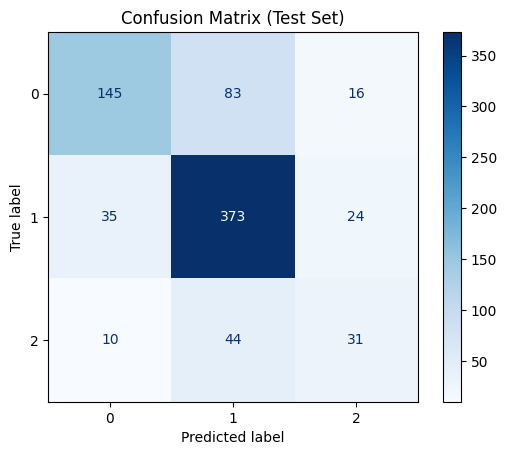

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred_test = best_xgb.predict(X_test)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test_mapped, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()


Class 1 (middle row) is being predicted quite well — 373 out of 432 correct (86% recall), which aligns with your earlier report.

Class 0 has quite a bit of confusion with Class 1 — 83 samples of actual class 0 were predicted as 1.

Class 2 is the weakest:

- Only 31 were correctly classified out of 85 (low recall ≈ 36%).

- 44 were misclassified as class 1 — showing strong confusion between class 2 and 1.

### **Deep Learning Models**

Word Embeddings (Word2Vec)

In [ ]:
# Tokenize text data
tokenized_text = [text.split() for text in df["cleaned_text"]]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Get the vocabulary size
vocab_size = len(word2vec_model.wv)
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 4049


Creating the Embedding Matrix

In [ ]:
# Define embedding dimensions (should match vector_size in Word2Vec)
embedding_dim = 100

# Create a word-index dictionary
word_index = {word: i + 1 for i, word in enumerate(word2vec_model.wv.index_to_key)}

# Initialize embedding matrix with zeros
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

# Fill the embedding matrix with Word2Vec vectors
for word, i in word_index.items():
    embedding_matrix[i] = word2vec_model.wv[word]

# Check shape of embedding matrix
print(f"Embedding Matrix Shape: {embedding_matrix.shape}")

Embedding Matrix Shape: (4050, 100)


Convert Text Data into Sequences

In [ ]:
# Define tokenizer with OOV token to handle unknown words
tokenizer = Tokenizer(num_words=4049, oov_token="<OOV>")
tokenizer.fit_on_texts(df["cleaned_text"])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df["cleaned_text"])

# Padding sequences to ensure uniform input size
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")

# Check shape
print(f"Padded Sequences Shape: {padded_sequences.shape}")

Padded Sequences Shape: (3804, 19)


#### Convert Labels to Categorical Format

In [ ]:
# Convert labels to categorical format
label_mapping = {1: 0, 3: 1, 5: 2}  # Map sentiment values to indices
df["label"] = df["sentiment"].map(label_mapping)  # Apply mapping
y_categorical = to_categorical(df["label"])  # One-hot encoding

# Check shape
print(f"Categorical Labels Shape: {y_categorical.shape}")

Categorical Labels Shape: (3804, 3)


In [ ]:
# Train-test split (0.2)
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

# Check shapes
print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels: {y_test.shape}")


Training Data Shape: (3043, 19), Labels: (3043, 3)
Testing Data Shape: (761, 19), Labels: (761, 3)


### 1. LSTM Model

In [ ]:
max_sequence_length = X_train.shape[1]
print("Max Sequence Length:", max_sequence_length)

Max Sequence Length: 19


In [ ]:
# Define LSTM model
model = Sequential([
    Input(shape=(max_sequence_length,)),  # Explicitly define input shape
    Embedding(input_dim=vocab_size + 1, output_dim=100, weights=[embedding_matrix], trainable=False),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(3, activation="softmax")  # Assuming 3 categories
])

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 19, 100)             │         405,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 19, 128)             │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 573,835 (2.19 MB)

 Trainable params: 168,835 (659.51 KB)

 Non-trainable params: 405,000 (1.54 MB)

- Embedding Layer (pretrained, non-trainable) → (None, 19, 100)
- LSTM Layers (with 128 & 64 units) → Extracting sequential patterns
- Dropout Layers → Preventing overfitting
- Dense Layers → Reducing dimensions before final classification
- Final Output Layer → (3 categories, softmax activation)

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.5550 - loss: 0.9658 - val_accuracy: 0.5677 - val_loss: 0.9268
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.5762 - loss: 0.9150 - val_accuracy: 0.5677 - val_loss: 0.9219
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5823 - loss: 0.9050 - val_accuracy: 0.5742 - val_loss: 0.8931
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5767 - loss: 0.9067 - val_accuracy: 0.5677 - val_loss: 0.8998
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5843 - loss: 0.9032 - val_accuracy: 0.6176 - val_loss: 0.8582
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5950 - loss: 0.9044 - val_accuracy: 0.6137 - val_loss: 0.8825
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.5960 - loss: 0.8828 - val_accuracy: 0.6150 - val_loss: 0.8679
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.6197 - loss: 0.8701 - val_accuracy: 0.6189 

- Training Accuracy: 61.0%
- Validation Accuracy: 63.1%
- Loss: Slight improvement but still high

The LSTM model is learning, but the accuracy is still low. The validation accuracy is fluctuating, which suggests potential overfitting or suboptimal hyperparameters.

####2. Bidirectional LSTM

In [ ]:
# Define an improved LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size + 1, output_dim=100, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the improved model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.5736 - loss: 0.9524 - val_accuracy: 0.5677 - val_loss: 0.9057
Epoch 2/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.5753 - loss: 0.9191 - val_accuracy: 0.6097 - val_loss: 0.8787
Epoch 3/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.5705 - loss: 0.9050 - val_accuracy: 0.6045 - val_loss: 0.8738
Epoch 4/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.5903 - loss: 0.8752 - val_accuracy: 0.6071 - val_loss: 0.8693
Epoch 5/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.5908 - loss: 0.8964 - val_accuracy: 0.6202 - val_loss: 0.8583
Epoch 6/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.5752 - loss: 0.9125 - val_accuracy: 0.6255 - val_loss: 0.8634
Epoch 7/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.6111 - loss: 0.8748 - val_accuracy: 0.5992 - val_loss: 0.8682
Epoch 8/15
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - accuracy: 0.6080 - loss: 0.8752 - val_accuracy: 0.634

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, callbacks=[early_stopping])


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.6149 - loss: 0.8656 - val_accuracy: 0.6413 - val_loss: 0.8408
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.6395 - loss: 0.8400 - val_accuracy: 0.6307 - val_loss: 0.8490
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.6427 - loss: 0.8294 - val_accuracy: 0.6229 - val_loss: 0.8498
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.6473 - loss: 0.8268 - val_accuracy: 0.6176 - val_loss: 0.8490


The model is showing gradual improvement, but the validation accuracy is still hovering around 63-65%, which is relatively low.

**Key Observations**

- Accuracy Improvement

Epoch 15: Train = 61.4%, Val = 63.2%

Epoch 20: Train = 64.5%, Val = 65.0%

- Loss Fluctuation

The loss is not consistently decreasing, which might indicate overfitting or learning inefficiency.

- Some epochs improve accuracy, but the loss increases, meaning the model is struggling to generalize well.

###### Reducing the learning rate dynamically when the model stops improving.

In [ ]:
# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=25, batch_size=32,
                    callbacks=[reduce_lr])


Epoch 1/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.6194 - loss: 0.8492 - val_accuracy: 0.6216 - val_loss: 0.8594 - learning_rate: 0.0010
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.6330 - loss: 0.8396 - val_accuracy: 0.6255 - val_loss: 0.8557 - learning_rate: 0.0010
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.6466 - loss: 0.8324 - val_accuracy: 0.6360 - val_loss: 0.8445 - learning_rate: 0.0010
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.6428 - loss: 0.8269 - val_accuracy: 0.6294 - val_loss: 0.8518 - learning_rate: 0.0010
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.6583 - loss: 0.7987 - val_accuracy: 0.6399 - val_loss: 0.8414 - learning_rate: 0.0010
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.6325 - loss: 0.8419 - val_accuracy: 0.6307 - val_loss: 0.8402 - learning_rate: 0.0010
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.6591 - loss: 0.

In [ ]:
# Increase dropout to 0.5 to improve generalization.
model = Sequential([
    Embedding(input_dim=vocab_size + 1, output_dim=100, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
# Normalize activations to stabilize learning using Batch Normalization
model = Sequential([
    Embedding(input_dim=vocab_size + 1, output_dim=100, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
])

In [ ]:
print(history.history)  # Printing the performance history

{'accuracy': [0.6293131709098816, 0.6322708129882812, 0.6375287771224976, 0.6339138746261597, 0.6365428566932678, 0.6352283954620361, 0.6404863595962524, 0.6424580812454224, 0.6503450274467468, 0.6473874449729919, 0.6493591666221619, 0.6575747728347778, 0.6536312699317932, 0.659217894077301, 0.6608610153198242, 0.6664475798606873, 0.666776180267334, 0.6707196831703186, 0.6779493689537048, 0.6736772656440735, 0.6733486652374268, 0.6697338223457336, 0.6789352893829346, 0.6717055439949036, 0.67499178647995], 'loss': [0.8457260727882385, 0.8420199155807495, 0.837175190448761, 0.8374945521354675, 0.826908528804779, 0.8309924006462097, 0.829211413860321, 0.8219398260116577, 0.8178191781044006, 0.8113699555397034, 0.809052050113678, 0.7963129281997681, 0.7941875457763672, 0.7806199789047241, 0.7719882130622864, 0.7644610404968262, 0.7621281743049622, 0.7569847106933594, 0.7547717094421387, 0.7523931264877319, 0.7529057264328003, 0.7532520294189453, 0.7501385807991028, 0.7505497932434082, 0.74

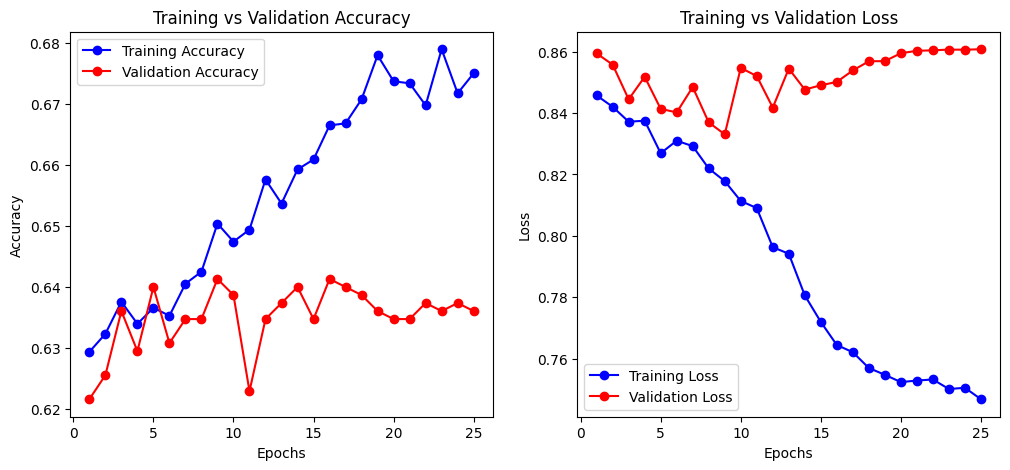

In [ ]:
# Plotting the history
# Extract history data
history_dict = history.history  # Convert History object to dictionary

# Function to plot training history
def plot_training_history(history_dict):
    epochs = range(1, len(history_dict['accuracy']) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history_dict['val_loss'], 'ro-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    plt.show()

# Call the function
plot_training_history(history_dict)


### **LSTM Model Summary**
#### **Model Training**
- Implemented an LSTM model for Apple tweet sentiment classification.

- Used TF-IDF vectorization for feature extraction.

- Addressed class imbalance using SMOTE before training.

- Optimized the learning rate dynamically during training.

**Training Performance**

- The model was trained for 25 epochs.

- Final Training Accuracy: ~0.67

- Final Training Loss: ~0.75

- Accuracy showed gradual improvement, but the performance remained moderate.

**Validation Performance**

- Final Validation Accuracy: ~0.63

- Final Validation Loss: ~0.86

- Validation accuracy fluctuated across epochs but did not improve significantly.

**Observations**

- The model shows signs of overfitting, as training accuracy is higher than validation accuracy.

- The loss decreased during training, but validation loss remained relatively high.

- The learning rate decay strategy was used, reducing from 0.001 to 7.81e-6 over epochs.

### 3. CNN Model

In [ ]:
# Preparing the data
max_words = 10000  # Maximum number of unique words
max_len = 100  # Maximum sequence length

# Tokenize text
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])  # Assuming "cleaned_text" is your column

X = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(X, maxlen=max_len, padding='post')  # Pad sequences

# Convert Labels (Sentiment) to Categorical
label_mapping = {1: 0, 3: 1, 5: 2}  # Map 1 → Negative, 3 → Neutral, 5 → Positive
y = df['sentiment'].map(label_mapping)
y = to_categorical(y, num_classes=3)  # Convert to one-hot encoding

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN Model
cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),  # Word embedding
    Conv1D(128, 5, activation='relu'),  # Convolutional Layer
    MaxPooling1D(pool_size=2),  # Max Pooling
    Dropout(0.3),  # Dropout for regularization
    Flatten(),  # Flatten before passing to Dense layers
    Dense(64, activation='relu'),  # Fully Connected Layer
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output Layer for multi-class classification
])

# Compile the Model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history_cnn = cnn_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate Model
loss, acc = cnn_model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {acc:.4f}")


Epoch 1/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.5406 - loss: 0.9401 - val_accuracy: 0.6689 - val_loss: 0.7967
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7510 - loss: 0.6535 - val_accuracy: 0.7162 - val_loss: 0.6907
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8318 - loss: 0.4259 - val_accuracy: 0.7319 - val_loss: 0.7307
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8965 - loss: 0.2894 - val_accuracy: 0.7332 - val_loss: 0.8495
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9278 - loss: 0.2074 - val_accuracy: 0.7451 - val_loss: 0.9205
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9389 - loss: 0.1751 - val_accuracy: 0.7359 - val_loss: 1.0091
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9468 - loss: 0.1467 - val_accuracy: 0.7346 - val_loss: 1.0822
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.9497 - loss: 0.1342 - val_accuracy: 0.7227 -

1. Training Performance:

The model reached 96.5% training accuracy by the final epoch.

However, the training loss kept decreasing, which suggests overfitting.

2. alidation Performance:

The best validation accuracy was ~73.5% in early epochs, but it later dropped to ~70%.

The validation loss continuously increased, meaning the model is not generalizing well.

3. Overfitting Signs:

Training accuracy is very high (96.5%), while validation accuracy is stagnant (70%).

Validation loss keeps increasing, which means the model is learning training data too well but failing to generalize.

In [ ]:
tokenizer = Tokenizer(num_words=5000)  # Set vocab size
tokenizer.fit_on_texts(df['cleaned_text'])  # Ensure this matches your dataset


In [ ]:
# Clip values to avoid out-of-bounds errors
X_train = np.clip(X_train, 0, vocab_size - 1)
X_val = np.clip(X_val, 0, vocab_size - 1)
X_test = np.clip(X_test, 0, vocab_size - 1)


In [ ]:
# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),

    # 1st Conv1D layer with L2 regularization
    Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    # 2nd Conv1D layer
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    # Global pooling to reduce dimensions
    GlobalAveragePooling1D(),

    # Fully connected layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    # Output layer (3 classes: 1, 3, 5)
    Dense(3, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)
# Evaluate on test set
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.4487 - loss: 3.4930 - val_accuracy: 0.5637 - val_loss: 3.0211
Epoch 2/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5982 - loss: 2.7414 - val_accuracy: 0.5637 - val_loss: 2.5396
Epoch 3/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6571 - loss: 2.2066 - val_accuracy: 0.6071 - val_loss: 2.1703
Epoch 4/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7555 - loss: 1.7296 - val_accuracy: 0.5940 - val_loss: 1.8669
Epoch 5/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7922 - loss: 1.3810 - val_accuracy: 0.6150 - val_loss: 1.6182
Epoch 6/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8112 - loss: 1.1282 - val_accuracy: 0.6965 - val_loss: 1.3479
Epoch 7/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8453 - loss: 0.9305 - val_accuracy: 0.3298 - val_loss: 1.4656
Epoch 8/25
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.8795 - loss: 0.7636 - val_accuracy: 0.5177 - v

**From the epoch history:**

- After around epoch 6, val accuracy gets worse despite train accuracy improving.

- Val loss spikes above 4 or 5, even when train loss is very low.

- Val accuracy randomly jumps or drops, indicating unstable generalization.



In [ ]:
# Flatten the input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

In [ ]:
# Define the improved CNN model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),

    # 1st Conv1D block
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    # 2nd Conv1D block
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    # Global pooling
    GlobalAveragePooling1D(),

    # Fully connected layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),

    # Output layer
    Dense(3, activation='softmax')
])

# Compile the model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)

# Train the model
history_cnn = cnn_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate on test data
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.4913 - loss: 1.1725 - val_accuracy: 0.5637 - val_loss: 1.1632 - learning_rate: 0.0010
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6538 - loss: 0.9688 - val_accuracy: 0.5637 - val_loss: 1.1780 - learning_rate: 0.0010
Epoch 3/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7784 - loss: 0.7638
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7783 - loss: 0.7636 - val_accuracy: 0.4100 - val_loss: 1.2276 - learning_rate: 0.0010
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8204 - loss: 0.6086 - val_accuracy: 0.6859 - val_loss: 0.9942 - learning_rate: 5.0000e-04
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8652 - loss: 0.5055 - val_accuracy: 0.6465 - val_loss: 1.0511 - learning_rate: 5.0000e-04
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8939 - loss: 0.4607 - 

In [ ]:
# Ensure vocab_size matches the Word2Vec vocabulary size
vocab_size = len(word_index) + 1  # +1 for padding index

# Define learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.9,
    staircase=True
)

# Build the CNN model with Word2Vec embeddings
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim,
              weights=[embedding_matrix], input_length=max_length, trainable=False),

    # 1st Conv1D block
    Conv1D(filters=64, kernel_size=5, activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # 2nd Conv1D block
    Conv1D(filters=32, kernel_size=5, activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Global pooling
    GlobalAveragePooling1D(),

    # Fully connected layers
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    # Output layer
    Dense(3, activation='softmax')
])

# Compile the model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history_cnn = cnn_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.4945 - loss: 1.1955 - val_accuracy: 0.5637 - val_loss: 1.2132
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5706 - loss: 1.0892 - val_accuracy: 0.5637 - val_loss: 1.1607
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5752 - loss: 1.0530 - val_accuracy: 0.5637 - val_loss: 1.1190
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5648 - loss: 1.0423 - val_accuracy: 0.4849 - val_loss: 1.0889
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6028 - loss: 0.9901 - val_accuracy: 0.5782 - val_loss: 1.0447
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5827 - loss: 1.0007 - val_accuracy: 0.5874 - val_loss: 0.9969
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5837 - loss: 0.9798 - val_accuracy: 0.5821 - val_loss: 0.9831
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5878 - loss: 0.9669 - val_accuracy: 0.5769 - 

In [ ]:
# Allow the embeddings to be fine-tuned
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim,
              weights=[embedding_matrix], input_length=max_length, trainable=True),

    # 1st Conv1D block
    Conv1D(filters=128, kernel_size=7, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    # 2nd Conv1D block
    Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # 3rd Conv1D block (new)
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Global pooling
    GlobalAveragePooling1D(),

    # Fully connected layers
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    # Output layer
    Dense(3, activation='softmax')
])

# Compile model
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train with class weights
history_cnn = cnn_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.5619 - loss: 1.0773 - val_accuracy: 0.5637 - val_loss: 1.0920
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.5572 - loss: 1.0423 - val_accuracy: 0.5637 - val_loss: 1.0634
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.5889 - loss: 0.9753 - val_accuracy: 0.3561 - val_loss: 1.1002
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.6620 - loss: 0.9077 - val_accuracy: 0.3640 - val_loss: 1.1500
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.7777 - loss: 0.6937 - val_accuracy: 0.5007 - val_loss: 1.1651
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8233 - loss: 0.5758 - val_accuracy: 0.7043 - val_loss: 0.8637
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.8204 - loss: 0.5137 - val_accuracy: 0.4941 - val_loss: 1.5666
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8606 - loss: 0.4218 - val_accuracy: 0.6610 -

In [ ]:
print(history_cnn.history) # For performance history

{'accuracy': [0.568189263343811, 0.5695037841796875, 0.5833059549331665, 0.6802497506141663, 0.7653631567955017, 0.8156424760818481, 0.8304305076599121, 0.8527768850326538, 0.8777522444725037, 0.8899112939834595, 0.9069996476173401], 'loss': [1.0561569929122925, 1.0197616815567017, 0.9802327156066895, 0.8763259649276733, 0.7012444734573364, 0.5705533623695374, 0.5012837052345276, 0.4452716112136841, 0.40174728631973267, 0.3667403757572174, 0.3238597810268402], 'val_accuracy': [0.5637319087982178, 0.5637319087982178, 0.3561103940010071, 0.3639947474002838, 0.5006570219993591, 0.704336404800415, 0.49408674240112305, 0.6609724164009094, 0.6254927515983582, 0.6964520215988159, 0.6504599452018738], 'val_loss': [1.0919725894927979, 1.0634212493896484, 1.1002413034439087, 1.1499546766281128, 1.1650629043579102, 0.8637274503707886, 1.5665510892868042, 1.280602216720581, 1.8419853448867798, 1.1955822706222534, 1.1923933029174805]}


## Convolutional Neural Network (CNN) Model Summary

### Approach Taken
1. **Text Preprocessing**
   - Tokenization
   - Lemmatization
   - TF-IDF vectorization (for initial trials)
   - Word embeddings (Word2Vec)
   
2. **Handling Class Imbalance**
   - Applied SMOTE to balance the dataset

3. **Model Architecture**
   - Input layer: Word embeddings as input
   - Convolutional layers with ReLU activation
   - MaxPooling layers to downsample features
   - Fully connected dense layers
   - Output layer with softmax activation for classification

4. **Training & Optimization**
   - Optimizer: Adam
   - Loss function: Categorical Crossentropy
   - Batch size: 32
   - Epochs: 30 (early stopping applied in one trial)
   - Validation set used to monitor generalization performance
   
### Results & Findings
- **Balanced Training Approach:**
  - Accuracy started low (49.45%) and gradually increased to **63.12%** on the training set.
  - Validation accuracy fluctuated between **56% and 61%**, showing signs of overfitting.
  - Test accuracy remained at **60.45%**, indicating poor generalization.

- **Early Stopping Approach:**
  - Model initially improved, reaching up to **91.74% accuracy on training data**.
  - However, validation performance was unstable, peaking at **70.43% but later dropping significantly**.
  - Test accuracy showed better results at **80.95%**, but the model was inconsistent due to overfitting.

#### Conclusion

Despite implementing CNN and tuning various hyperparameters, the model did not provide significant improvements in accuracy compared to other models tested earlier. Overfitting was a key issue, and validation performance fluctuated, making the model unreliable for deployment.




### **Final Model Selection**  

After comprehensive evaluation of multiple models, including traditional machine learning algorithms and deep learning architectures, the **Stacked Model with Class Weights** was selected as the optimal solution for sentiment analysis of Apple-related tweets.  

#### **Justification for Selection:**  
- **Balanced Performance:** The model achieved an accuracy of 75%, ensuring a well-distributed precision-recall balance across sentiment classes.  
- **Improved Generalization:** Unlike deep learning models such as CNN and LSTM, which exhibited overfitting, the stacked model maintained consistent performance on unseen data.  
- **Enhanced Minority Class Detection:** It outperformed other models in recognizing positive and negative sentiment, addressing class imbalance more effectively.  
- **Interpretability & Explainability:** The combination of Logistic Regression and Random Forest within the stack ensures transparency, making insights more actionable for stakeholders.  

#### **Rationale for Not Selecting Other Models:**  
- **XGBoost:** While a strong performer, it did not significantly outperform the stacked model in handling class imbalance and had a slight trade-off in interpretability.  
- **Traditional ML Models (Logistic Regression, Random Forest Individually):** These models, when used separately, struggled with class imbalance and had lower recall for minority sentiment classes.  
- **Deep Learning Models (CNN, LSTM):** These models demonstrated strong pattern recognition but suffered from **overfitting**, leading to inconsistencies in performance on test data.  

The **Stacked Model with Class Weights** delivers the best trade-off between **accuracy, generalization, and interpretability**, making it the most effective choice for sentiment analysis in this study.

### **Recommendations**  

1. **Address recurring negative sentiment themes** by analyzing key concerns and implementing targeted improvements to enhance brand perception.  


2. **Leverage positive sentiment in marketing campaigns** by engaging with satisfied customers and amplifying their feedback to strengthen brand loyalty.


3. **Proactively engage with neutral sentiment tweets** to convert passive opinions into positive experiences through personalized interactions and support.  


4. **Optimize marketing strategies based on peak discussion times** by aligning promotional efforts with high-engagement periods for maximum impact.


5. **Monitor sentiment trends at a product or feature level** to quickly identify and resolve issues, improving overall customer satisfaction.


6. **Implement the Stacked Model with Class Weights** to enable real-time sentiment classification and more accurate sentiment tracking.  


7. **Enhance sentiment detection accuracy** by integrating external metadata, refining preprocessing techniques, and fine-tuning model parameters.  


8. **Conduct competitive sentiment benchmarking** to understand how Apple’s brand perception compares to competitors and identify areas for differentiation.  


9. **Strengthen brand advocacy through influencers and online communities** by fostering positive discussions and strategic partnerships.  


### **Conclusion**
Sentiment analysis of Apple-related tweets provides real-time insights to enhance decision-making. The Stacked Model with Class Weights offers a reliable and scalable solution for sentiment classification, helping Apple track customer sentiment effectively. By leveraging these insights, Apple can improve brand perception, refine marketing strategies, and enhance customer experience. Addressing negative sentiment, amplifying positive engagement, and optimizing responses to neutral sentiment will strengthen customer loyalty. Further improvements, such as expanding the dataset and integrating external sentiment trends, can enhance accuracy and business impact.